epoch 20, x1 -0.943467, x2 -0.000073


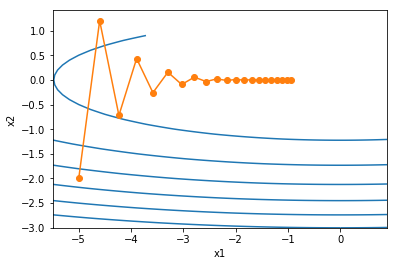

In [1]:
%matplotlib inline
import d2lzh as d2l
import torch

eta = 0.4

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.387814, x2 -1673.365109


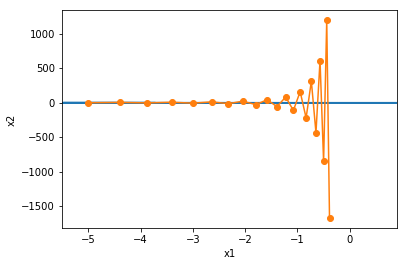

In [2]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.062843, x2 0.001202


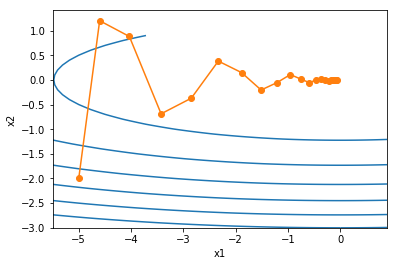

In [3]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1 0.007188, x2 0.002553


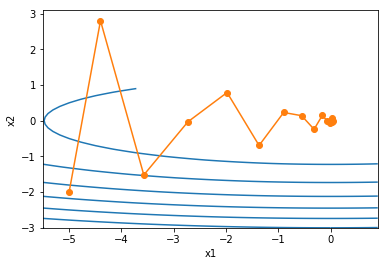

In [4]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

In [5]:
features, labels = d2l.get_data_ch7()

In [6]:
def init_momentum_states():
    v_w = torch.zeros(features.shape[1], 1)
    v_b = torch.zeros(1)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        v.data = hyperparams['momentum'] * v + hyperparams['lr'] * p.grad
        p.data -= v

loss: 0.245386, 0.034327 sec per epoch


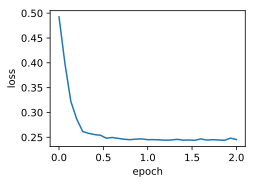

In [7]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr': 0.02, 'momentum': 0.5}, features, labels)

loss: 0.245908, 0.033139 sec per epoch


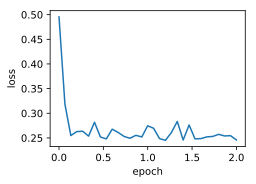

In [8]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr': 0.02, 'momentum': 0.9}, features, labels)

loss: 0.242711, 0.036378 sec per epoch


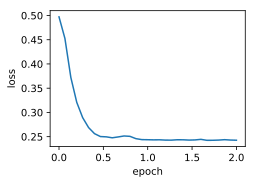

In [9]:
d2l.train_ch7(sgd_momentum, init_momentum_states(), {'lr': 0.004, 'momentum': 0.9}, features, labels)

loss: 0.250282, 0.029616 sec per epoch


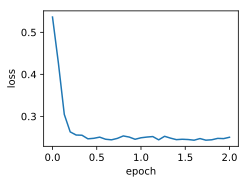

In [10]:
d2l.train_pytorch_ch7(0.004, features, labels, momentum=0.9, op='sgd')